# Learning Objectives

Towards the end of this lesson, you should be able to:
- experiments with Keras model
- build classifier and regressor using Keras 

# Creating a keras model

### Model building steps

There are steps in building a keras model:
- specify architecture (how many layers, what activation function to use at each layer)
- compile the model (specify the loss function)
- fit model  
- predict

The following block diagram shows the Keras Workflow. Basically, once you have prepared the training and test data, you can follow these steps closely to train a neural network in Keras.


### Regression - Predicting the Wages

The example below will build a **regression model** to predict an employee’s hour per week.

In [1]:
# Load relevant libraries
# regression: predicting 

import pandas as pd
import numpy as np
 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical
from iteration_utilities import deepflatten

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#read in data
# goal: to predict the wage per hour

df = pd.read_csv('hourly_wages.csv')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


Split up the dataset into train and test.

In [3]:
# Prepare the train-test-split
# 20% of the data to do the testing

from sklearn.model_selection import train_test_split

X = df.drop(columns=['wage_per_hour'])
y = df['wage_per_hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model Building

The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it.

In [6]:
#create model
# sequential function: one layer after another
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]
n_cols

9

We use the ‘add()’ function to add layers to our model. We will add two layers and an output layer.


‘Dense’ is the layer type. Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.

We have 10 nodes in each of our input layers. This number can also be in the hundreds or thousands. Increasing the number of nodes in each layer increases model capacity. I will go into further detail about the effects of increasing model capacity shortly.

In [7]:
# add model layers
# add function to add layers to the model
# we added 2 input layers and 1 output layer (we can add more)
# last line: we just need 1 node to predict the number
# not possible to use the activtion function (sigmoid) because we dont want..
# the hourly wages to be within 0 and 1
# relu: minimum = 0, never negative, leave the number as it is

model.add(Dense(100, input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))

‘Activation’ is the activation function for the layer. An activation function allows models to take into account nonlinear relationships. For example, if you are predicting diabetes in patients, going from age 10 to 11 is different than going from age 60–61.

The activation function we will be using is ReLU or Rectified Linear Activation. Although it is two linear pieces, it has been proven to work well in neural networks.

The first layer needs an input shape. The input shape specifies the number of rows and columns in the input. The number of columns in our input is stored in ‘n_cols’. There is nothing after the comma which indicates that there can be any amount of rows.

The last layer is the output layer. It only has one node, which is for our prediction.


### Compiling the model
Next, we need to compile our model. Compiling the model takes two parameters: **optimizer and loss**.
The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.
For our loss function, we will use ‘mean_squared_error’. It is calculated by taking the average squared difference between the predicted and actual values. It is a popular loss function for regression problems. The closer to 0 this is, the better the model performed.

In [8]:
#compile model using mse as a measure of model performance
# we try to minimize the loss, which calculated from the mean squared error
# adam: benchmark optimizer to use (not good or bad)
model.compile(optimizer='adam', loss='mean_squared_error')

### Training the model
Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following five parameters: training data (train_X), target data (train_y), validation split, the number of epochs and callbacks.
The validation split will randomly split the data into use for training and testing. During training, we will be able to see the validation loss, which give the mean squared error of our model on the validation set. We will set the validation split at 0.2, which means that 20% of the training data we provide in the model will be set aside for testing model performance.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. In addition, the more epochs, the longer the model will take to run. To monitor this, we will use ‘early stopping’.

Early stopping will stop the model from training before the number of epochs is reached if the model stops improving. We will set our early stopping monitor to 3. This means that after 3 epochs in a row in which the model doesn’t improve, training will stop. Sometimes, the validation loss can stop improving then improve in the next epoch, but after 3 epochs in which the validation loss doesn’t improve, it usually won’t improve again.

In [10]:
#set early stopping monitor so the model stops training when it won't improve anymore
# patience of 3 (3 executives row in which the model isn't improve at a particular rate, then it will be terminated)
early_stopping_monitor = EarlyStopping(patience=3)

#train model
# verbose = 2: we want to see the output
# epochs: iterations
model.fit(X_train, y_train, validation_split = 0.2, epochs = 200, callbacks = [early_stopping_monitor], verbose = 2)


Epoch 1/200
11/11 - 3s - loss: 98.7502 - val_loss: 58.6661 - 3s/epoch - 287ms/step
Epoch 2/200
11/11 - 0s - loss: 34.2550 - val_loss: 23.7816 - 196ms/epoch - 18ms/step
Epoch 3/200
11/11 - 0s - loss: 28.3268 - val_loss: 19.9696 - 187ms/epoch - 17ms/step
Epoch 4/200
11/11 - 0s - loss: 24.6731 - val_loss: 19.2704 - 157ms/epoch - 14ms/step
Epoch 5/200
11/11 - 0s - loss: 24.2232 - val_loss: 18.7389 - 158ms/epoch - 14ms/step
Epoch 6/200
11/11 - 0s - loss: 24.2629 - val_loss: 18.7260 - 148ms/epoch - 13ms/step
Epoch 7/200
11/11 - 0s - loss: 24.1762 - val_loss: 18.4053 - 151ms/epoch - 14ms/step
Epoch 8/200
11/11 - 0s - loss: 23.9317 - val_loss: 19.0325 - 163ms/epoch - 15ms/step
Epoch 9/200
11/11 - 0s - loss: 23.9443 - val_loss: 18.1813 - 171ms/epoch - 16ms/step
Epoch 10/200
11/11 - 0s - loss: 23.8301 - val_loss: 18.1123 - 175ms/epoch - 16ms/step
Epoch 11/200
11/11 - 0s - loss: 24.1834 - val_loss: 17.6818 - 188ms/epoch - 17ms/step
Epoch 12/200
11/11 - 0s - loss: 23.9821 - val_loss: 17.7443 - 154

### Making predictions on new data
If you want to use this model to make predictions on new data, we would use the ‘predict()’ function, passing in our new data. The output would be ‘wage_per_hour’ predictions.

In [11]:
# example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
# X_test: to test the performance of the model
y_pred = model.predict(X_test)
print(y_pred)

4/4 [==============================] - 0s 5ms/step
[[ 9.198097 ]
 [ 9.707701 ]
 [11.677627 ]
 [ 6.855891 ]
 [ 9.70972  ]
 [12.083679 ]
 [13.482656 ]
 [10.818192 ]
 [ 8.225691 ]
 [11.0518465]
 [ 7.3827143]
 [11.339156 ]
 [ 9.781504 ]
 [11.953682 ]
 [ 8.276663 ]
 [12.036535 ]
 [12.195499 ]
 [ 9.488253 ]
 [ 7.127662 ]
 [ 8.969088 ]
 [ 8.562572 ]
 [ 9.884817 ]
 [ 7.9085484]
 [ 8.910795 ]
 [10.288864 ]
 [11.23122  ]
 [ 8.323567 ]
 [11.018069 ]
 [ 5.8978443]
 [10.543056 ]
 [10.435541 ]
 [10.134848 ]
 [ 7.82129  ]
 [ 9.062043 ]
 [10.828337 ]
 [ 8.306157 ]
 [ 8.813035 ]
 [ 9.621666 ]
 [ 8.648806 ]
 [ 7.756564 ]
 [ 6.920302 ]
 [ 9.0915365]
 [10.254208 ]
 [10.34087  ]
 [11.842181 ]
 [ 7.7101307]
 [11.579336 ]
 [ 6.46978  ]
 [ 8.813035 ]
 [ 9.387488 ]
 [10.054918 ]
 [ 7.8034534]
 [11.124159 ]
 [10.42985  ]
 [11.195467 ]
 [ 9.801131 ]
 [11.067451 ]
 [ 8.729727 ]
 [10.11156  ]
 [ 9.506214 ]
 [ 9.926677 ]
 [10.021142 ]
 [ 7.20337  ]
 [ 7.4542456]
 [ 8.3984165]
 [ 9.325256 ]
 [ 9.361256 ]
 [11.326635

In [17]:
y_test

172    11.25
464     6.25
196     9.37
414     4.50
530     6.10
       ...  
364     7.96
498    10.00
225     5.65
495    11.25
316     9.33
Name: wage_per_hour, Length: 107, dtype: float64

In [16]:
# get the mean squared error for the datasets

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("The MAE is", mean_absolute_error(y_test, y_pred)) # sho shmol, v fantastic
print("The MSE is", mean_squared_error(y_test, y_pred))


The MAE is 3.433659578305539
The MSE is 17.834181926896036


# Classification - Diabetes or not?

In [18]:
df_diabetes = pd.read_csv('diabetes_data.csv')
df_diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df_diabetes.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object

In [20]:
# split data using train-test-split

X = df_diabetes.drop(columns=['diabetes'])
y = df_diabetes['diabetes'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
#create model
model_2 = Sequential()

#get number of columns in training data
n_cols_2 = X_train.shape[1]

#add layers to model
model_2.add(Dense(250, activation='relu', input_shape=(n_cols_2,))) # input
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
# classification work: sigmoid to floor it to 0 or ceil it to 1
# sigmoid: to keep everything between 0 and 1

In [23]:
# binary_crossentropy becase we're doing binary classification
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
history = model_2.fit(X_train, y_train, epochs = 100, validation_split = 0.33)

Epoch 1/100
13/13 [==============================] - 4s 58ms/step - loss: 1.9252 - accuracy: 0.4915 - val_loss: 0.7679 - val_accuracy: 0.6650
Epoch 2/100
13/13 [==============================] - 0s 20ms/step - loss: 0.7888 - accuracy: 0.6253 - val_loss: 0.6817 - val_accuracy: 0.6502
Epoch 3/100
13/13 [==============================] - 0s 20ms/step - loss: 0.6734 - accuracy: 0.6302 - val_loss: 0.6937 - val_accuracy: 0.6256
Epoch 4/100
13/13 [==============================] - 0s 20ms/step - loss: 0.6455 - accuracy: 0.6448 - val_loss: 0.6906 - val_accuracy: 0.5320
Epoch 5/100
13/13 [==============================] - 0s 20ms/step - loss: 0.5996 - accuracy: 0.6691 - val_loss: 0.7422 - val_accuracy: 0.6108
Epoch 6/100
13/13 [==============================] - 0s 20ms/step - loss: 0.5859 - accuracy: 0.7080 - val_loss: 0.6446 - val_accuracy: 0.6650
Epoch 7/100
13/13 [==============================] - 0s 20ms/step - loss: 0.5828 - accuracy: 0.6934 - val_loss: 0.6690 - val_accuracy: 0.6502
Epoch 

In [ ]:
history = model_2.fit(X_train, y_train, epochs = 300,
                      validation_split = 0.33,
                     verbose = 0)

In [ ]:
history = model_2.fit(X_train, y_train, epochs = 500,
                      validation_split = 0.33,
                     verbose = 0)

# overfit: the model use the training dataset syok sendiri
# area between two lines becoming larger
# the test line is starting to decrease gradually

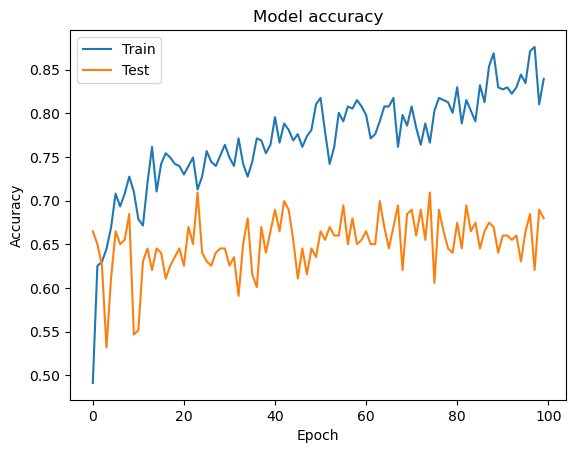

In [25]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# characteristics of neuralnetwork: stabilize result reaching almost 1

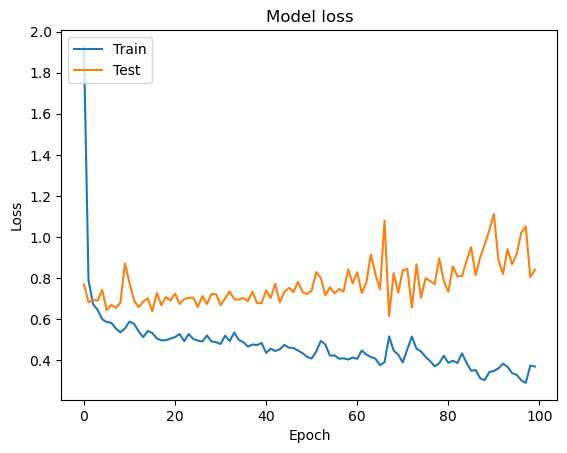

In [26]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# in short, we're trying to have both lines to be near to each other as possible

In [27]:
# get the predicted output for xText. Then set yPred2>0.5

y_pred2 = model_2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

5/5 [==============================] - 0s 6ms/step


In [29]:
y_pred2[:5]

array([[ True],
       [False],
       [False],
       [ True],
       [False]])

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[82 25]
 [21 26]]


# Classification - Banknote Authentication

You will practice building classification models in Keras with the Banknote Authentication dataset.

## Explore the dataset

In [31]:
# Load the dataset name banknote.txt and store as df_banknote

df_banknote = pd.read_csv('banknote.txt', sep=',')
df_banknote.columns = ['variance', 'skewness' , 'curtosis' ,  'entropy' , 'class']
df_banknote.head()


,variance,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [32]:
# Describe the data
print('Dataset stats: \n', df_banknote.describe)


Dataset stats: 
 <bound method NDFrame.describe of       variance  skewness  curtosis  entropy  class
0      4.54590   8.16740   -2.4586 -1.46210      0
1      3.86600  -2.63830    1.9242  0.10645      0
2      3.45660   9.52280   -4.0112 -3.59440      0
3      0.32924  -4.45520    4.5718 -0.98880      0
4      4.36840   9.67180   -3.9606 -3.16250      0
...        ...       ...       ...      ...    ...
1366   0.40614   1.34920   -1.4501 -0.55949      1
1367  -1.38870  -4.87730    6.4774  0.34179      1
1368  -3.75030 -13.45860   17.5932 -2.77710      1
1369  -3.56370  -8.38270   12.3930 -1.28230      1
1370  -2.54190  -0.65804    2.6842  1.19520      1

[1371 rows x 5 columns]>


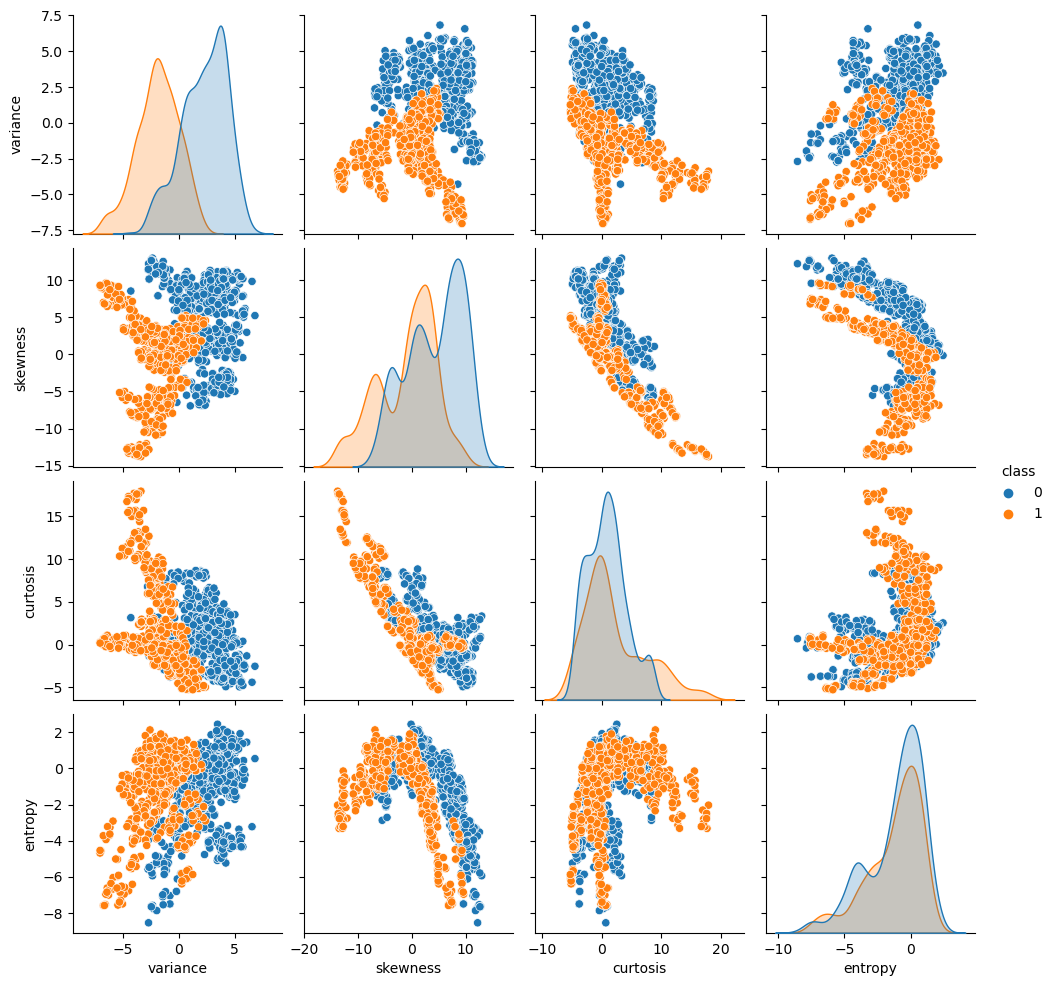

In [33]:
# Use pairplot and set the hue to be our class

sns.pairplot(df_banknote, hue='class')  

In [34]:
# Count the number of observations of each class
print('Observations per class: \n', df_banknote['class'].value_counts())

Observations per class: 
 0    761
1    610
Name: class, dtype: int64


In [35]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer  

model.add(Dense(5, activation = 'relu', input_shape = (4,)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Display a summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 25        
                                                                 
 dense_10 (Dense)            (None, 10)                60        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


## Is this dollar bill fake ?

You are now ready to train your model and check how well it performs when classifying new bills! The dataset has already been partitioned as X_train, X_test,y_train and y_test.

In [37]:
X = df_banknote.drop(columns=['class'])
y = df_banknote['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate the model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

Epoch 1/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.9918
Epoch 2/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9918
Epoch 3/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.9918
Epoch 4/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0303 - accuracy: 0.9918
Epoch 5/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0280 - accuracy: 0.9918
Epoch 6/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 0.9964
Epoch 7/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9954
Epoch 8/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.9982
Epoch 9/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9982
Epoch 10/20
35/35 [==============================] - 0s 7ms/step - loss: 0.0207 - accuracy: 0.9982
Epoch 11/20
35/35 [

# Classification - More than one class  


In [4]:
#dataset import

dataset = pd.read_csv('train.csv') #change directory accordingly
dataset.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
#Changing pandas dataframe to numpy array

X = dataset.iloc[:,:20].values # all columns besides price range
y = dataset.iloc[:,20:21].values # price range

This step is used to normalize the data. Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. It is an important step and you can check the difference in accuracies on our dataset by removing this step. It is mainly required in case the dataset features vary a lot as in our case the value of battery power is in the 1000’s and clock speed is less than 3. So if we feed unnormalized data to the neural network, the gradients will change differently for every column and thus the learning will oscillate.

In [6]:
#Normalizing the data
# normalize to get rid any numbers less than 0 or more than 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [7]:
# Convert the labels from integer to categorical (one-hot) encoding, it is the format required by Keras 
# to perform multiclass classification. 
# One-hot encoding is a type of boolean representation of integer data. 
# It converts the integer to an array of all zeros except a 1 at the index of the integer.

from tensorflow.keras.utils import to_categorical
y_one_hot = to_categorical(y)
 
# Show the category label after one-hot encoding
print('Original label 0 : ', y[0])
print('After conversion to categorical ( one-hot ) : ', y_one_hot[0])

Original label 0 :  [1]
After conversion to categorical ( one-hot ) :  [0. 1. 0. 0.]


In [8]:
# check y after and before one hot

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 500, 1: 500, 2: 500, 3: 500}

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y_one_hot, test_size = 0.1, shuffle= True, random_state=2)

### Constructing the network structure

We will be creating a neural network with 2 hidden layers and an output layer with 4 units. The number of units in the hidden layers is kept at 16 and 8. The input to the network is a 20-dimensional array.

We will use the Sequential model for building the network. In the Sequential model, we can just stack up layers by adding the desired layer one by one. We use the **Dense** layer, also formally known as a fully connected (FC) layer where all the neurons from one layer are connected to the neurons in the previous layer. Apart from the Dense layer, we add the **ReLU** activation function which is required to introduce non-linearity to the model. This will help the network learn non-linear decision boundaries. The last layer is a **softmax** layer as it is a multiclass classification problem. For binary classification, we can use the sigmoid function.

**Side notes**: 
1. Here's a classic response to the question of ["How many hidden units should I use?"](http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html)
2. [Activation Functions](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) in Neural Networks 
3. [Softmax vs. Sigmoid](https://medium.com/aidevnepal/for-sigmoid-funcion-f7a5da78fec2)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()

model.add(Dense(16, input_shape=(20,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
# softmax(4 nodes): the highest probability value will be the answer
 

Next, we configure the network by choosing the optimizer. Here, we choose `'SGD'`. We also specify the loss type which is categorical cross entropy which is used for multiclass classification. We also specify the metrics (accuracy in this case) which we want to track during the training process. You can also try using any other optimizers such as `'adam'` or `'rmsprop'`, or try adding more types of metrics that you would like to keep track.

Note: Momentum is a parameter for SGD (Stochastic Gradient Decent)

In [11]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Finally, just to check on a concise summary of what your neural network model has, use `summary()`

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 508
Trainable params: 508
Non-trainable params: 0
_________________________________________________________________


The network is row ready to be trained. This is done using the `fit()` function in Keras (just like how you would do in scikit-learn). We also specify the number of epochs as 20 for a start. You can increase or decrease this later as deem fit. In one epoch, the whole of the training data will be fed to the network 20 while we will be using the test data for validation.

In [13]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=200, batch_size=64)

Epoch 1/200
29/29 [==============================] - 3s 31ms/step - loss: 1.6147 - accuracy: 0.2444 - val_loss: 1.5240 - val_accuracy: 0.2500
Epoch 2/200
29/29 [==============================] - 0s 9ms/step - loss: 1.5161 - accuracy: 0.2572 - val_loss: 1.4623 - val_accuracy: 0.2500
Epoch 3/200
29/29 [==============================] - 0s 8ms/step - loss: 1.4625 - accuracy: 0.2694 - val_loss: 1.4188 - val_accuracy: 0.2550
Epoch 4/200
29/29 [==============================] - 0s 8ms/step - loss: 1.4247 - accuracy: 0.2822 - val_loss: 1.3911 - val_accuracy: 0.2850
Epoch 5/200
29/29 [==============================] - 0s 9ms/step - loss: 1.3969 - accuracy: 0.3017 - val_loss: 1.3685 - val_accuracy: 0.3000
Epoch 6/200
29/29 [==============================] - 0s 9ms/step - loss: 1.3733 - accuracy: 0.3178 - val_loss: 1.3491 - val_accuracy: 0.3200
Epoch 7/200
29/29 [==============================] - 0s 9ms/step - loss: 1.3520 - accuracy: 0.3322 - val_loss: 1.3297 - val_accuracy: 0.3450
Epoch 8/200


29/29 [==============================] - 0s 10ms/step - loss: 0.2371 - accuracy: 0.9244 - val_loss: 0.2435 - val_accuracy: 0.9300
Epoch 116/200
29/29 [==============================] - 0s 10ms/step - loss: 0.2349 - accuracy: 0.9233 - val_loss: 0.2437 - val_accuracy: 0.9250
Epoch 117/200
29/29 [==============================] - 0s 10ms/step - loss: 0.2327 - accuracy: 0.9261 - val_loss: 0.2428 - val_accuracy: 0.9300
Epoch 118/200
29/29 [==============================] - 0s 10ms/step - loss: 0.2305 - accuracy: 0.9261 - val_loss: 0.2427 - val_accuracy: 0.9150
Epoch 119/200
29/29 [==============================] - 0s 9ms/step - loss: 0.2284 - accuracy: 0.9294 - val_loss: 0.2402 - val_accuracy: 0.9250
Epoch 120/200
29/29 [==============================] - 0s 8ms/step - loss: 0.2261 - accuracy: 0.9306 - val_loss: 0.2390 - val_accuracy: 0.9300
Epoch 121/200
29/29 [==============================] - 0s 9ms/step - loss: 0.2242 - accuracy: 0.9333 - val_loss: 0.2370 - val_accuracy: 0.9250
Epoch 122

In [14]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

7/7 [==============================] - 0s 6ms/step - loss: 0.1975 - accuracy: 0.9250
Evaluation result on Test Data : Loss = 0.19745422899723053, accuracy = 0.925000011920929


The `fit()` function returns a history object which has a dictionary of all the metrics which were required to be tracked during training. We can use the data in the history object to plot the loss and accuracy curves to check how the training process went.
You can use the `history.history.keys()` function to check what metrics are present in the history. It should look like the following:

`[‘acc’, ‘loss’, ‘val_acc’, ‘val_loss’]`

Let us plot the loss and accuracy curves.

Text(0.5, 1.0, 'Accuracy Curves')

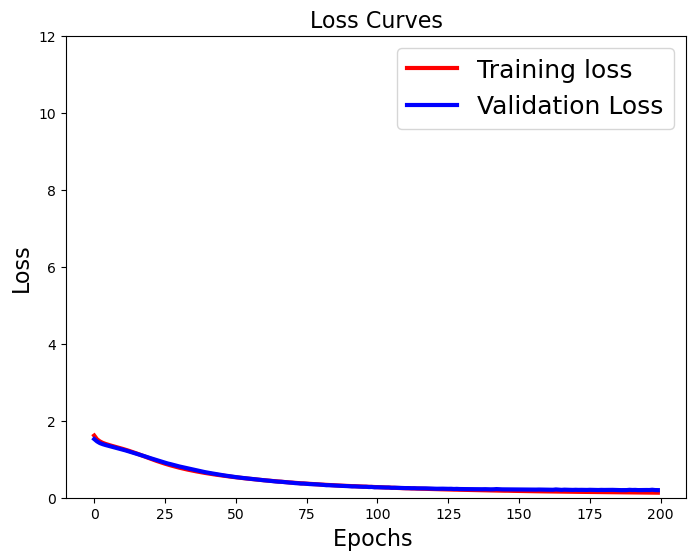

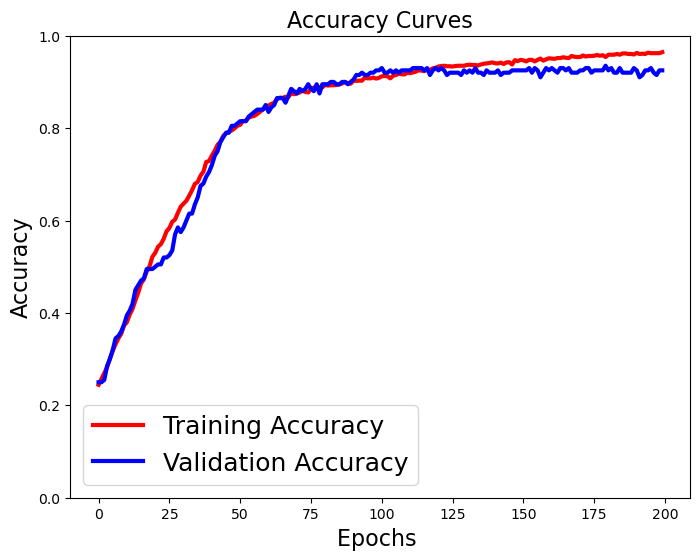

In [15]:
import matplotlib.pyplot as plt

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim((0, 12))
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim((0, 1))
plt.title('Accuracy Curves',fontsize=16)

# plot: pretty good graph

## Inference on new data
We have seen previously that the first image in the test set is the number 7. Let us see what the model predicts.

There are several ways to do inference on an image. If you would like to know the class of the input data...

In [21]:
X_test[0]

array([-1.59459414, -0.9900495 , -0.88532709, -1.01918398,  1.77185835,
        0.95788598, -1.65625959,  1.03435682,  1.0384336 ,  1.08404594,
        0.5085935 , -0.924354  , -1.36433061, -1.5742505 , -1.0223894 ,
       -0.4057118 , -0.36814045,  0.55964063, -1.00601811,  0.98609664])

In [22]:
y_test[0] # actual answer by the dataset

array([1., 0., 0., 0.], dtype=float32)

In [23]:
y_pred[0] # predicted answer (actual output of the model)
# then pick the max value from those 4
# hence, that is the answer

array([1.0244529e-09, 2.2723889e-03, 9.9167961e-01, 6.0479664e-03],
      dtype=float32)

In [27]:
# make probability predictions with the model
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 [==============================] - 0s 4ms/step


In the `predict_classes()` method, there is no score which tells us about the confidence level in which the model predicted the answer. In some cases, for example when there are many classes, we may want the probabilities of the different classes which indicate how confident the model is on a particular class or a few top classes. This helps us make the decision based on these scores. It is possible sometimes that the system intends to output a few top scoring classes (instead of just one), in this case, this is helpful

In [28]:
# Predict the probabilities for each class 
y_pred = model.predict(X_test[[1],:])

print("Ground truth price category:", y_test[1] )
print("Predicted price category:", y_pred )


1/1 [==============================] - 0s 75ms/step
Ground truth price category: [0. 0. 1. 0.]
Predicted price category: [[1.0244529e-09 2.2723889e-03 9.9167961e-01 6.0479664e-03]]


In [29]:
y_pred[0]

array([1.0244529e-09, 2.2723889e-03, 9.9167961e-01, 6.0479664e-03],
      dtype=float32)

In [30]:
np.argmax(y_pred[0]) # position of which value is the highest in the y_pred

2

In [32]:
# example
arr = np.array([1,2,3,4])

In [34]:
np.argmax(arr)

3